In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('emails.csv')

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [6]:
df.count()

Email No.     5172
the           5172
to            5172
ect           5172
and           5172
              ... 
military      5172
allowing      5172
ff            5172
dry           5172
Prediction    5172
Length: 3002, dtype: int64

In [7]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [8]:
df.size

15526344

In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [10]:
df=df.drop(['Email No.'],axis=1)

In [11]:
df.head(3)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x=df.drop(['Prediction'],axis=1)

In [13]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [14]:
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [28]:
y=df['Prediction']

In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [30]:
x.shape

(5172, 3000)

In [31]:
y.shape

(5172,)

In [32]:
x=scale(x)

In [33]:
x

array([[-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [ 0.11575699,  0.71450797,  1.33733653, ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       ...,
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [-0.3951477 ,  0.0851585 , -0.2938948 , ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [ 1.30786793,  1.86831533, -0.0102024 , ..., -0.0562853 ,
        -0.32904848, -0.07097072]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [35]:
x_train.shape

(4137, 3000)

In [36]:
x_test.shape

(1035, 3000)

In [37]:
y_train.shape

(4137,)

In [38]:
y_test.shape

(1035,)

In [51]:
knn=KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
pred=knn.predict(x_test)

In [54]:
accuracy_score(y_test,pred)

0.8444444444444444

In [60]:
cm=confusion_matrix(y_test,pred)

In [61]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

In [63]:
cn=ConfusionMatrixDisplay(cm,display_labels=knn.classes_)

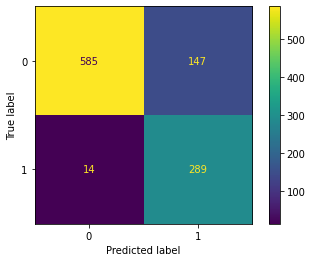

In [67]:
cn.plot()

In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       732
           1       0.66      0.95      0.78       303

    accuracy                           0.84      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.88      0.84      0.85      1035



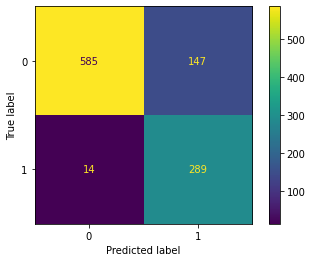

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [73]:
s=svm.SVC(kernel='linear')

In [75]:
s.fit(x_train,y_train)

SVC(kernel='linear')

In [76]:
y_pred=s.predict(x_test)

In [77]:
cm=confusion_matrix(y_test,y_pred)

In [78]:
cm

array([[712,  20],
       [ 29, 274]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred)

0.9526570048309179

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       732
           1       0.93      0.90      0.92       303

    accuracy                           0.95      1035
   macro avg       0.95      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

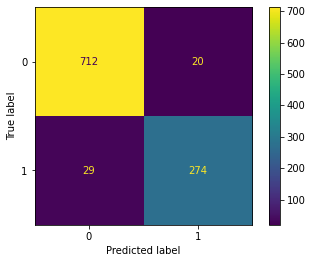

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)